# Fundamentals of Data Analysis (FoDA) - Tasks 2020

These are the workbook for the tasks that I have created for the FoDA module. This workbook has been created by Sheldon D'Souza (G00387857@gmit.ie)

***

### Task for the week of October 5, 2020 - Writing a function 'counts'

The objective of Task is to write a Python function called 'counts' that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values.

#### How the function works

- The function requires a list to be passed as an argument
- It also requires an optional argument of 1,2 or 3 to be passed to the function. The default value of this argument is '3'. The strings passed  correspond to the following  choice to be made by the user of the function:       
        * Enter '1' to treat all as upper case
        * Enter '2' to treat all as lower case
        * Enter '3' to count in original case

- Depending on the choice the user makes, the function will treat the unique items in the list as case sensitive or otherwise (e.g. a list containing 'A' and 'a' will give a count of A:2 or a:2 in case option 1 or 2 are selected respectively; and A:1 , a:1 when option 3 is selected). If the user inputs anything else except 1,2 or 3 the program gives an error message and terminates
- The function will return a dictionary of  unique items OR return an error message if the the  list has items which are outside the parameters (mentioned in the function limitations below) 


#### Function scope and limitations

The function accepts a list subject to the following limitations:

- The list can contain any characters (alphaumeric, special characters etc.)
- The list can contain another list/tuples. However, that embedded list/tuples/dictionary cannot contain any further lists/tuples/dictionary. In other words ONLY one layer of embded lists or tuples or dictionaries is allowed
- The list can contain a dictionary. However, that dictionary cannot contain any further list, tuple or dictionary (see previous point). Furthermore, the embedded dictionary needs to contain only numeric values.
- The embedded lists, tuples and dictionaries will be added to the count of values in the main list

If the above limitations are exceeded the function will return and error and will terminate. 


#### Researching and planning the exercise

I had seen a similar exercise covered in 'Automate the Boring Stuff with Python' by Al Sweigart [1] which I used as a base for the exercise. 

I planned the assignment as follows:

- Researching and writing the core code which does the count
- adding in the code for the imbedded lists/tuples and dictionaries
- added code which will check whether the values for the embedded dictionaries are numeric
- added code to merge the embedded dictionary and the 'output' dictionary together
- adding in the code for the argument which in turn will set a flag for whether the charaters should be counted as case sensitive and added code based on each 'flag' scenario
- added try and except codes to return an exception and terminate the function in case the program exceeds the inbuilt limitations 



#### Writing the code

*Core code*

The core piece of code is not very complicated and mainly revolved around the use of a for loop to iterate over the list. [2].

The core code uses the 'setdefault' method of a dictionary object to create keys where they do not aready exist and uses a counter to keep track of the number of instances for a particuar key. A sample of this code is below

```python
DICT.setdefault(item, 0)
DICT[item] = count_dict[item] + 1
```

*case senstivity argument code*

This code gives the user an option for choosing a numeric character 1,2 or 3. The default value set is 3 (see documentation above for the interpretation of these options) The function then uses an if, elif and else statement to evaluate the user input (converted to a string) and sets a varible to a certain state depending on the user input. The else statement terminates the function and returns an error message if the user inputs an incorrect argument in the function. (See documentation above for details of the choices offered)


*The main code block*

The main code of the program is written as follows:
1. Two blank dictionaries are created. The first one is to hold the output of the function and the second is to hold the content of any embedded list passed as an argument (these lists will be merged in a later part of the code)
2. A for loop that iterates through the list and checks for the data type. 
3. The function uses the inbuilt type function within python to check for the data type of each element of the list passed as an argument 
4. A series of if, elif and else statements then run seperate codes depending on the data type
5. If the data type is an list or tuple (i.e. an embedded within the main list passed) the function will run another for loop to iterate over each element within that list or tuple and run the 'core code' as detailed in the 'core code' section above'
6. If the data type is a dictionary, the code will use a for loop to iterate through the dictionary using an if statement to check whether each value of the dictionary is numerical (so that they can be combined with the main input dictionary). If any of the 'value' keys of the dictionary is not numerical, the function will terminate and return a string with the reason for the error. The code to accomplish this uses a flag variable that increases by '1' each time the value within the dictionary is numeric (isnumeric method of a string object). The flag variable is compared to the length of the dictionary and if the two are same it means that all the values in the dictionary are numeric. In this case the function appends the 'validated' dictionary to a temporary list using the .append method of a list object.
7. The next three blocks of code (2 elif and 1 else) checks whether the user wants the alpha characters to be upper or lower case or original case and then counts them accordingly converting them where necessary. The function checks whether the data type is a 'string' and also checks the value of the 'flag' variable set in the input block of the code. The code then uses the 'upper' or 'lower' attribute of a 'string' data type to convert the data item to upper or lower case. If no flag is selected (i.e. the flag variable is set to ''), the function treats upper and lower case data items as disctinct for the purpose of the output dictionary.
8. The final code in the code block merges the output and the 'embedded input' dictionaries together. The code was inpired by a stackoverflow post [4]. As mentioned in point 6 above, the embedded dictionaries are checked for validity and then appended onto a temporary list. The output dictionary is also appended onto this list and so we get a list of dictionaries. We then use two 'for' loops to (1) go through each dictionary and (2) then the items(key, value pairs) within each dictionary. Using  the 'setdefault' method of the dictionary object, we append the keys of the dictionaries to a new dictionary called 'final_dict. Setdefault ensures that the current dictionary key wil be added to the final_dict if it does not already exist and add together the values associated with that key on each iteration of the for loop.



*Error Handling*
As mentioned in the function scope and limitation sections above, the function will accept a single embedded list, tuple or  dictionary within the orginal input list. Anything other than this will cause a 'non hashable error' which will be handled by the 'try and except' block of code within which the function is embedded. Any TyperError generated will be addressed by the try and except code and will return an error message to the user specifing the error. [5]




#### References
[1] 'Automate the Boring Stuff with Python' by Al Sweigart - Chapter 5 - Dictionaires and Structuring Data: The Dictionary Data Type

[2] A Whirlwind tour of Python by Jake VanderPlas - 'Control Flow'

[4] https://stackoverflow.com/questions/20509570/merge-dictionaries-without-overwriting-previous-value-where-value-is-a-list

[5] A Whirlwind tour of Python by Jake VanderPlas - 'Errors and Exceptions'


In [8]:
def count(a_list, flag=3):
    '''This function takes a list as an argument and returns a dictionary of unique items and the 
        number of times they appear in the list. Arguments are:

            a_list: An input list (see documentation for limitations)
            flag:       Enter '1' to treat all as upper case.
                        Enter '2' to treat all as lower case.
                        Enter '3' to count in original case")

            (default value is 3)
    
            
            out: dictionary of unique items and recurrence within the list
    
    '''
    
    try: # used a try/except blocks to hand TypeErrors in case an invalid list is input
        
        
        #flag will ask for a user choice on whether the count for alpha characters will be case sensitive or not
        if str(flag) == '1':
            flag = 'upper'
        elif str(flag) == '2':
            flag = 'lower'
        elif str(flag) == '3':
            flag = ''
        else:
            return 'Invalid input. Please rerun program \
                    and make the correct case sensitivity choice' #Invalid choice terminates the program
        
        
        
        count_dict = {} # initial dictionary to count the data types. Start as blank
        final_dict = {} # the final dictionary returned by the function. Start as blank
        templist = [] #temp list to accumulate the dictionaries. Start as blank 
        
        for item in a_list: #iterate through each item on the list and count it's elements based on the type of the item
            
            if type(item)==list or type(item)==tuple: #The program will allow one layer of list or tuples within the input list
                for inner_item in item:
                    if type(inner_item) == str and flag == 'upper':
                        inner_item = inner_item.upper()
                    elif type(inner_item) == str and flag == 'lower':
                        inner_item = inner_item.lower()
                    count_dict.setdefault(inner_item, 0) #setdefault will generate a key if none exists and give it the value of zero
                    count_dict[inner_item] = count_dict[inner_item] + 1 #1 will be added to the 'value' of the key in the previous line
                        
                    
            elif type(item)==dict:
                tempflag = 0  #see below
                for value in item.values():
                    if str(value).isnumeric(): #this checks whether if each value in  the dictionary is numeric
                        tempflag = tempflag + 1 #if numeric the flag value will increase by 1
                if tempflag == len(item): #if all values are numeric; the flag value will equal the length of the dictionary
                    templist.append(item) # In this case the dictionary is valid and is included for further processing into a temporary list
                else:
                    return 'Error, One of more values of the input dictionary are not numeric. \
                        #Please include a proper dictionary' #if the value of the inner dictionary are not numbers the function terminates and returns an error to the user
                    
            
            #The next three blocks of code (2 elif and 1 else) checks whether the user wants the alpha characters to be upper
            # or lower case or original case and then counts them accordingly converting them where necessary.
            elif type(item)==str and flag == 'lower':
                item_lower = item.lower()
                count_dict.setdefault(item_lower, 0)
                count_dict[item_lower] = count_dict[item_lower] + 1

            elif type(item)==str and flag == 'upper':
                item_upper = item.upper()
                count_dict.setdefault(item_upper, 0)
                count_dict[item_upper] = count_dict[item_upper] + 1

            else:
                count_dict.setdefault(item, 0)
                count_dict[item] = count_dict[item] + 1

        templist.append(count_dict) # This appends all dictionaries together within a single list

        for d in templist: #This code goes through each item in the list (which are dictionaries)
            for k, v in d.items(): #and for each dictionary will iterate through each key value pair
                final_dict.setdefault(k, 0) #setdefaut will add the key to the final_dict (even if it doesn't exist)
                final_dict[k] = final_dict[k] + v #and add the 'values' of the keys together
        
        return final_dict
    
    except TypeError:
        return "Error. You have included a list/tuple within a list/tuple or an invaid dictionary. \
                Please refer to Readme file to see acceptable input parameters"

#### Testing the function

See below a test of the function:

In [9]:
my_list = [[1,2,1,2,3],[2,3,5,7,9],3,7,{1:7, 3:2},{1:12, 5:7, 'cat':4},'a', 'A', 'a', 'A',(1,2,3),(3,4,5),'spam','eggs',('spam','eggs')]

count(my_list, 3)

{1: 22,
 3: 7,
 5: 9,
 'cat': 4,
 2: 4,
 7: 2,
 9: 1,
 'a': 2,
 'A': 2,
 4: 1,
 'spam': 2,
 'eggs': 2}

### END TASK 1

***

### Task for the week of November 2nd, 2020 - Writing a function 'dicerolls'

The objective of Task is to write a Python function called 'dicerolls' that simulates the rolling of 'k' number of dice for 'n' number of rolls. The function takes two inputs (1) 'k', which are the number of dice rolled and (2) 'n' which is the number of times 'k' dice are rolled. The sum of the face values of each dice is collated after each roll. The output of the function is a dictionary which returns the sum of the face values from each roll as the keys and the count of the number of times that each sum of face values is rolled.

The end dictionary should look something like: 

`{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}`

#### Project Plan:

- Write proof of concept code (as code seems pretty simple). Code comprises mainly of two for loops
- Include input validation and error handling
- tighten up code
- Finalise code by cleaning up variables etc
- Include an analysis of the data by graphs
- Any other interesting analysis?
- Add commentary and oberservations and documentation

#### How the function works

- The function requires two arguments to be passed to the function:
    * k: Which is the number of dice being rolled by the user
    * n: The number of times the user wants to roll 'n' number of dice
- The function accumulates the sum of the face values of each dice for each roll
- Once all rolls have been completed, the function returns a dictionary of each unique value rolled and the number of times that value was rolled. 

#### Function scope and limitations

- The can only take positive integers as value for k and n.
- Any other value will be return an error message and terminate the function


#### Writing the code

The code itself is very simple and can be broken down as below:

- Add error handling code for input validation (see section below)
- import random module within jupyter (numpy random RNG could also be used here)
- create a blank list and dictionary to hold output
- write a for loop to iterate over the range (using the range function) of n (number of rolls)
- write and embedded for loop to iterate over the range (using the range function) of the number of dice
- add the face value of each dice to a count variable
- after each of the dice has been rolled (for each n roll), the sum of the rolls, in other words the current value of the count variable, is appended to a blank list
- Once each of the n rolls is completed, a for loop will iterate over the values of the output list
- using the `.setdefault` method of the dictionary object to create keys where they do not aready exist and uses a counter to keep track of the number of instances for a particuar key.
- The return method will return the dictionary to the user.
- Added a variable to capture the values passed to the function [6] and returned these values through the return method of the function [5] (This was used for the plotting analysis)  


#### Error handling

The error handling section uses the an 'if' loop to check whether both 'n' and 'k' are integers and are greater than zero. If an error arises the return method will return an error message and terminate the program.

#### Analysing the data generated

The function was set up to return two values. The output dictionary as mentioned above, which is the main output of the function, as well as a variable which stored the values of the arguments passed to the function. When a function returns multiple values these are returned as a tuple and so to access each return value, indexing is used.

The dictionary (at index 0) was used to pass to a pyplot (matplotlib) bar plot [4] and the arguments passed (at index 1) were used to create a Title for that plot.



#### References
[1] 'Automate the Boring Stuff with Python' by Al Sweigart - Chapter 5 - Dictionaires and Structuring Data: The Dictionary Data Type

[2] A Whirlwind tour of Python by Jake VanderPlas - 'Control Flow'

[3] A Whirlwind tour of Python by Jake VanderPlas - 'Errors and Exceptions'

[4] Plotting a histogram from a Dictionary - https://stackoverflow.com/questions/21195179/plot-a-histogram-from-a-dictionary

[5] https://note.nkmk.me/en/python-function-return-multiple-values/

[6] https://stackoverflow.com/questions/10724495/getting-all-arguments-and-values-passed-to-a-function

In [2]:
def dicerolls(k, n):
    arg_passed = locals() #captures the values of the arguments passed to the function
    if type(k) != int or type(n) != int or k <= 0 or n <= 0:
        return("The number of dice 'k' and the number of rolls 'n' need to be positive integers")
    
    import random #import random module
    rolls_list = [] #empty list to accumulate the sum of the dice after each roll
    rolls_dict = {} # dictionary to hold the final output
    for no_rolls in range(n): #first for loop to simulate the number of rolls
        sumof_rolls = 0 # variable to hold the sum of the values per roll
        for no_dice in range(k): # for loop to simlulate the number of dice 
            sumof_rolls = sumof_rolls + random.randint(1, 6) # random selection of the dice roll and accumulation of the rolls in the count variable
            rolls_list.append(sumof_rolls) #append the result of sum of the rolls to a list
    for item in rolls_list: #for loop to iterate through list of rolls values
        rolls_dict.setdefault(item, 0) #generate keys where none exist using the setdefault method
        rolls_dict[item] = rolls_dict[item] + 1 #accunulate the values for each key
    return (rolls_dict, arg_passed) #returns the final dictionary and locals() value as a tuple (can also be a list)

The distribution of values of the dicerolls is as follow:
myDictionary = {1: 1668, 2: 1671, 4: 1676, 6: 1629, 3: 1710, 5: 1646}



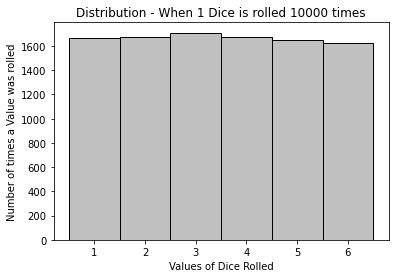

In [103]:
# Rolled 1 dice 10,000 times

mytuple = dicerolls(1,10000) # Code written assign the tuple returned by the function to a variable


myDictionary = mytuple[0] # will return the 1st value of the tuple, i.e. the dictionary 

print('The distribution of values of the dicerolls is as follow:')
print(f"{myDictionary = }")

print()

import matplotlib.pyplot as plt
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='silver', edgecolor='black') #pass dictionary keys and values to a bar plot
plt.xlabel('Values of Dice Rolled')
plt.ylabel('Number of times a Value was rolled')
plt.title(f'Distribution - When {mytuple[1]["k"]} Dice is rolled {mytuple[1]["n"]} times') #using the locals() value of the tuple (2nd value)
plt.show() #explictly show plot

Analysis:

As can be see above when only one dice is rolled for a large number of times, the distribution becomes uniform, i.e. because each number has the same chance of being rolled, over many rolls each value will be rolled the same number of times each.

The distribution of values of the dicerolls is as follow:

myDictionary = {1: 1679, 5: 2760, 2: 1936, 4: 2591, 6: 3063, 3: 2177, 8: 1352, 7: 1684, 10: 827, 9: 1090, 11: 555, 12: 286}



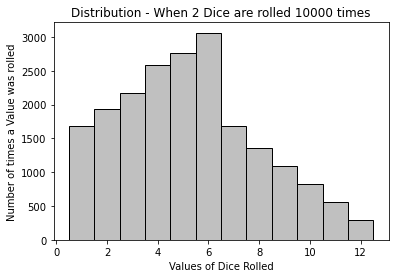

In [67]:
# Rolled 2 dice 10,000 times

mytuple = dicerolls(2,10000)


myDictionary = mytuple[0]

print('The distribution of values of the dicerolls is as follow:')
print()
print(f"{myDictionary = }")

print()

import matplotlib.pyplot as plt
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='silver', edgecolor='black')
plt.xlabel('Values of Dice Rolled')
plt.ylabel('Number of times a Value was rolled')
plt.title(f'Distribution - When {mytuple[1]["k"]} Dice are rolled {mytuple[1]["n"]} times')
plt.show()

The distribution of values of the dicerolls is as follow:

myDictionary = {6: 3485, 8: 2371, 9: 2278, 4: 2649, 12: 1449, 2: 1939, 3: 2330, 13: 956, 1: 1707, 7: 2382, 11: 1806, 10: 2049, 15: 440, 5: 3040, 14: 685, 17: 131, 16: 261, 18: 42}



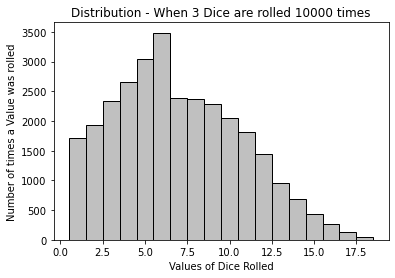

In [66]:
# Rolled 3 dice 10,000 times

mytuple = dicerolls(3,10000)


myDictionary = mytuple[0]

print('The distribution of values of the dicerolls is as follow:')
print()
print(f"{myDictionary = }")

print()

import matplotlib.pyplot as plt
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='silver', edgecolor='black')
plt.xlabel('Values of Dice Rolled')
plt.ylabel('Number of times a Value was rolled')
plt.title(f'Distribution - When {mytuple[1]["k"]} Dice are rolled {mytuple[1]["n"]} times')
plt.show()

The distribution of values of the dicerolls is as follow:

myDictionary = {1: 1695, 7: 2546, 13: 2045, 15: 1509, 2: 1945, 3: 2277, 4: 2600, 6: 3512, 10: 2774, 11: 2571, 12: 2476, 9: 2645, 8: 2624, 14: 1869, 5: 3114, 17: 933, 18: 716, 16: 1211, 20: 250, 21: 147, 19: 426, 22: 80, 23: 29, 24: 6}



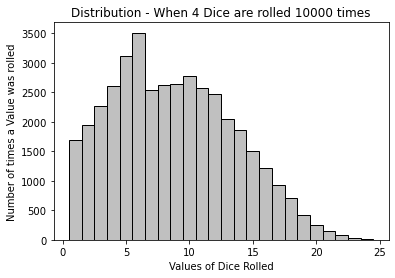

In [65]:
# Rolled 4 dice 10,000 times

mytuple = dicerolls(4,10000)


myDictionary = mytuple[0]

print('The distribution of values of the dicerolls is as follow:')
print()
print(f"{myDictionary = }")

print()

import matplotlib.pyplot as plt
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='silver', edgecolor='black')
plt.xlabel('Values of Dice Rolled')
plt.ylabel('Number of times a Value was rolled')
plt.title(f'Distribution - When {mytuple[1]["k"]} Dice are rolled {mytuple[1]["n"]} times')
plt.show()


The distribution the dicerolls for 1,2,3, and 4 dice for 10,000 turns each is as follows:


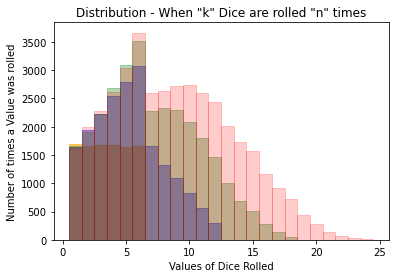

In [68]:
# Plot all distributions over each other on one axis

print()
print('The distribution the dicerolls for 1,2,3, and 4 dice for 10,000 turns each is as follows:')


import matplotlib.pyplot as plt

mytuple = dicerolls(1,10000)
myDictionary = mytuple[0]
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='orange', edgecolor='orange', alpha=0.6)

mytuple = dicerolls(2,10000)
myDictionary = mytuple[0]
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='blue', edgecolor='blue', alpha=0.4)

mytuple = dicerolls(3,10000)
myDictionary = mytuple[0]
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='green', edgecolor='green', alpha=0.3)

mytuple = dicerolls(4,10000)
myDictionary = mytuple[0]
plt.bar(myDictionary.keys(), myDictionary.values(), 1.0, color='red', edgecolor='red', alpha=0.2)


plt.xlabel('Values of Dice Rolled')
plt.ylabel('Number of times a Value was rolled')
plt.title(f'Distribution - When "k" Dice are rolled "n" times')
plt.show()

Analysis of the above:

As seen from the above distributions, the patterns of the plots show that the while the smaller and larger values occur less frequently that the middle range values, there seems to be a definive inverse corrleation between the larger numbers and the frequency of occurence of these numbers.

The last plot attempts to super-impose all distributions over each other to show the above pattern emerge.

### End Task 2

***

### Task for the week of November 16th, 2020 - Distribution of a coin flip

Objective:

Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve. You should explain your work in a Markdown cell above the code

Project Plan:

- I have already done a lot of the research for this for the Programming for Data Analytics Assignment. So, I will be leveraging that research here
- Research and document why the flipping of a coin for a signifcant number of simulations will result in roughly a bell shape curve
- Write code for program using numpy random and only the random module
- Create plot for outcome
- Compare plot to normal distibution
- Analyse and comment on result

#### BINOMIAL DISTRIBUTION

> ```
> Generator.binomial(n, p, size=None)
> ```
>
> Draw samples from a binomial distribution.
>
> Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

Binomial distribution will give the sum of the outcomes of 'n' number of trials where the probability of the 'binomial' outcome, ZERO or ONE is 'p'. In other words 'p' is the probability of success that a True value or '1' value will come up for each n trials. The result of the function is the **sum** of successful outcomes (remember that True is '1') for each iteration of 'n' trials. The size refers to the number of times (scenarios) that the 'n' trials are run (independent of each other)

In the section below, there is an example of the numpy binomial distribution in action in its most basic form. The data below simulates a single coin toss done 1000 times. Each time a coin is tossed, it has a 50% probability of landing on either heads or tails.

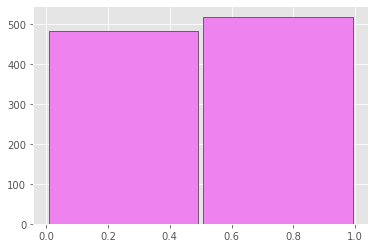

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

x = np.random.default_rng().binomial(1, 0.5, size=1000) # 1 trial with a 50% success rate and 1000 scenario run
sns.distplot(x, color='violet', hist=True, kde=False, bins=2, hist_kws={"rwidth":0.97,'edgecolor':'black', 'alpha':1.0}) #plotting the outcomes
plt.show()

##### Analysis of the distribution above and moving towards to normal distribution:

As can be seen above , when 1 trial scenario is run 1000 times the results shows a distict binomial distribution. Each histogram bar has a width of 0.5 (probability of 50%) and the count of the scenarios (size) being equally distributed (approximately 500 times each).

If however, the number of trials increase and the number of scenarios for those trials increase, then the distribution will be closer to a normal distribution.

The reason for this is that the normal distribution is centred around a mean with values tapering off on either size of the mean.

In case of a binomial distibution, when the number of trials increase, the number True and False values are more likely to be evenly split for each trial (see example above) thus resulting in a greater concentration of values around the 50/50 split after each scenario (or size) is completed.

There will be a number of scenarios, where the split will not be an even 50/50, but rather say 60/40 or 70/30. However, we can expect that there will be hardly any scenarios where the split will be 90/10 or 80/20 and the likelihood of a 100/0 will be next to Nil.

In numpy the binomial function will return the number of ***successful outcomes*** from each trial i.e. where True = 1 and False = 0. For each scenario (or size) the function will accumulate a count of successful outcomes and store these values. When the function is plotted, in essence, the sum of the 'True' values for each trial 'n' is being plotted.

If we now analyse the results, we will see that it will represent a normal distribution.


### Assignment code:

The code below will simulate a 100 coin flips, 100,000 times. We can expect each single coin flip to have a 50% chance of landing on heads or tails and so when the number of heads and tails in 100 such flips are accumulated together as a single set, we would expect to see a variation in the number of heads and tails that arose within each set of a 100 flip e.g. some flips will have more heads than tails and vice versa. 

If we were then to plot out the distribution of each of these 100 flips a 100,000 times, we would expect the see a normal distibution type of plot.

The following plot illustrates this:

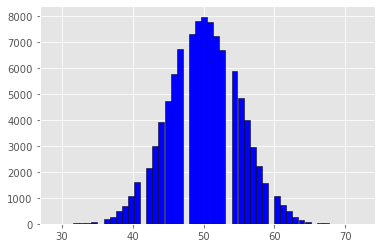

In [47]:
x = np.random.default_rng().binomial(n=100, p=0.5, size=100000) # 100 coin flips with a 50% success rate  and 1000000 scenarios run
sns.distplot(x, color='b', hist=True, kde=False, hist_kws={"rwidth":0.98,'edgecolor':'black', 'alpha':1.0}) #plotting the outcomes
plt.show()

##### Analysis of the above:


In the code above, we can clearly see that the number of values around the 50/50 spilt is the most concentrated around the 48-53  bins. This is consistent with our analysis above where we would expect the coin to be split in a 50/50 scenario and taper off on either side for extremely high or low values.

There are certain bins however where there are no values. In my instance of running the code, the bins around 44, 47 and 59 have no bars. We would expect as we increase 'size' argument in the function, these may be filled. We would also expect that in each running of the code the 'empty bars' might be differently distributed. This attribute of the binomial distribution (i.e. empty bins) as illustrated above makes it slightly varied from the normal distribution.

We shall see below a comparison between the two.

### Comparison of the binomial and normal distribution

The plot below shows the binomial distribution, as generated in the scenario above superimposed over a normal distribution curve generated with a mean of 50 and a size of 100,000. These attributes are similar to the binomial distribution scenario run above and hence we would expect to see the distributution to be similar as well.

We will experiment with the 'scale' variable to see what sort of standard deviation will be applicable to the distribution.

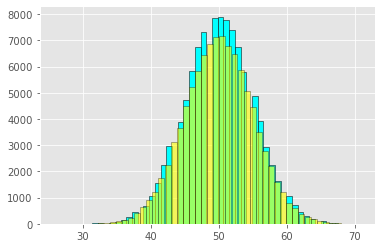

In [92]:
x = np.random.default_rng().binomial(n=100, p=0.5, size=100000) # 100 coin flips with a 50% success rate  and 1000000 scenarios run
sns.distplot(x, color='cyan', hist=True, kde=False, hist_kws={"rwidth":0.98,'edgecolor':'black', 'alpha':1.0}) #plotting the outcomes

y = np.random.default_rng().normal(loc=50, scale=5, size=100000) # 100 coin flips with a 50% success rate  and 1000000 scenarios run
sns.distplot(y, color='yellow', hist=True, kde=False, hist_kws={"rwidth":0.98,'edgecolor':'black', 'alpha':0.6}) #plotting the outcomes

plt.show()

##### Analysis of the above comparison:


As can be seen from the above plot, the binomial function plot for our program is very similar to a plot with a normal distribution. The key obseravtions are:
- the above binomial distribution plotted by us has mean of 50 and a standard deviation of 5. A normal distibution generally has a standard deviation of 3. This implies that the binomial distribution above is slightly more spread out than a standard normal distribution.
- there are certain bins which are missing from the binomial distribution. These can be seen in 'yellow' bars above. While these are not many, there seem to be no bars missing from the normal distribution.

##### Reference Notes and Research Summary:

**What is a normal distribution:**

>Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

(Reference: https://www.investopedia.com/terms/n/normaldistribution.asp)



**How can a binomial distribution behave like a normal distribution:**

> A binomial distribution is very different from a normal distribution, and yet if the sample size is large enough, the shapes will be quite similar.
>
> The key difference is that a binomial distribution is discrete, not continuous. In other words, it is NOT possible to find a data value between any two data values.

(Reference: 
http://staweb.sta.cathedral.org/departments/math/mhansen/public_html/23stat/handouts/normbino.htm#:~:text=A%20binomial%20distribution%20is%20very,between%20any%20two%20data%20values)



**Relationship between the distributions:**

The diagram below tries to illustrate the link between various distributions. As almost all distributions are forms of (or linked to) the Bernoulli distribution, it is reasonable to deduce that it should be possible to derive one distribution from another. This is why the binomial and the normal distribution exhibit similar patterns of distributions under certain senarios.

<img src="https://miro.medium.com/max/875/1*szMCjXuMDfKu6L9T9c34wg.png" alt="Common Probability Distributions" style="width:500px;"/>


(Credit Sean Owen - https://medium.com/@srowen/common-probability-distributions-347e6b945ce4)

### End Task 3

***

### Task for the week of November 30th, 2020 -  Simpson’s paradox

Objective:

Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox.

Project Plan:
- Research Simpson's paradox using the lectures, YouTube videos and Wikipedia page
- Decide on the data for each of the four dataset on the basis of the straight line equation y = mx + c
- Give each of the lines a trend and plot these line
- Aggregate the data for each of the individual datasets generated
- Plot the aggregated data
- Compare the indivdual plots and the aggregated plot to show Simpson's paradox


**What is the Simpson's Paradox:**

As per Wikipedia:

>Simpson's paradox, which also goes by several other names, is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

It is difficult to put in layman's terms but simply speaking it is a skewing of a charateristic observed in a dataset as a whole, due to a the proportions of the distribution of the attributes in the underlying data which make up the overall dataset's characteristic.

It is easier explained by an example. Let's presume that there are four datasets each of them following a simple linear regression trend.

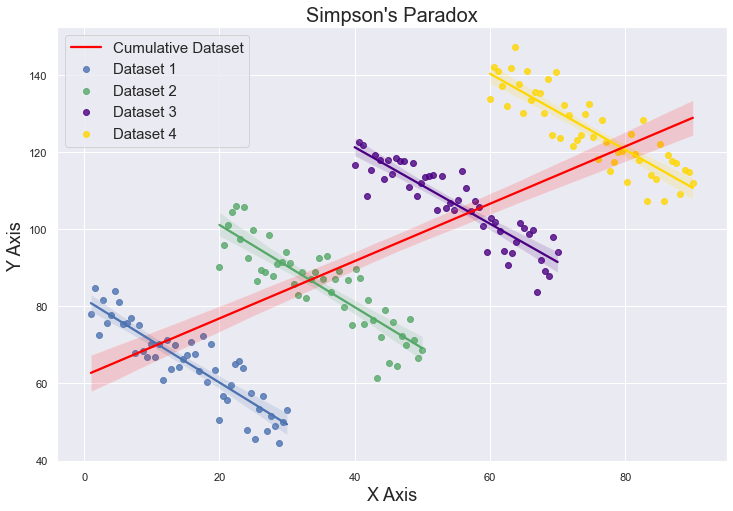

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')


m = -1 # set the slope of line

c1 = 80
c2 = 120
c3 = 160
c4 = 200


x1 = np.linspace(1, 30, num=50, endpoint=True) # generate x axis data - 20 numbers between the intervals specified
x2 = np.linspace(20, 50, num=50, endpoint=True)
x3 = np.linspace(40, 70, num=50, endpoint=True)
x4 = np.linspace(60, 90, num=50, endpoint=True)


y1 = (m * x1 + c1) + np.random.default_rng().normal(1,5, len(x1)) # generate y axix by using linear euqation and add variation in the data by adding in random noise

y2 = (m * x2 + c2) + np.random.default_rng().normal(1,5, len(x2))

y3 = (m * x3 + c3) + np.random.default_rng().normal(1,5, len(x3))

y4 = (m * x4 + c4) + np.random.default_rng().normal(1,5, len(x4))


x_cum = np.concatenate((x1, x2,  x3,  x4)) # accumulated the x data
y_cum = np.concatenate((y1,  y2,  y3,  y4))

sns.set(rc={'figure.figsize':(12,8)}) #https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

sns.regplot(x1, y1, color='b', label='Dataset 1') #plotted the x and y data using a regression plot in seaborn
sns.regplot(x2, y2, color='g', label='Dataset 2')
sns.regplot(x3, y3, color='indigo', label='Dataset 3')
sns.regplot(x4, y4, color='gold', label='Dataset 4')

sns.regplot(x_cum, y_cum, color='red', label='Cumulative Dataset', scatter=False)

plt.title("Simpson's Paradox", fontsize=20)
plt.xlabel('X Axis', fontsize=18)
plt.ylabel('Y Axis', fontsize=18)
plt.legend(fontsize=15)

plt.xlim((min(x1)-5), (max(x4)+5))


plt.show()

**Analysis of the above plot:**

A number of observations can be made about the above data:

*Analysis of the individual plots:*

- Each of the dataset has a negative slope and so each of the datasets will trend downwards
- This may lead us to believe that the observation in all for sets of data there is an inverse relationsip between the variables on the x axis and y axis.


*Analysis of the cumulative plots:*
- However when a regression line is plotted over the cumulative data there is a clear positive relationship between the variables on the x and y axis.
- The reason for this is that the individual groups have different scalar relationships with each other and so may not be able to be directly accumulated. In case of the above each datset starts much higher than the next on both the x and y axis.


*Analysis through an example:*

- In a real world dataset this may depict e.g. The relationship between the crime rate and increase in population. Each of the data sets represent an area within a city. X would then represent the population (in say millions) while Y would be the number of crimes reported.
- If looked at on a cumulative basis it would indicate that the crime rate is increasing as the population increases, however when looked on an area by area basis (for the 4 areas plotted), we can see a clear downwards trend in the data for each area.
- The cumulative data is skewed because some areas might have higher crime rates and higher populations to begin with, so even though the number of crimes follows a downwards trend for those area, when all areas are accumulated together it would seem like there is an upwards trend in the overall crime rate for the city.


**R-Squared of the Datasets:**

What is R-Squared (https://www.investopedia.com/terms/r/r-squared.asp)

>R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

Using the numpy correlation coefficient function (np.corrcoef), I calculated the results correlation coffiecient of each of the Datasets (incluing the cumulative Dataset). I then squared this, to get the r-squared value.

I then plotted a bar plot of the output to visually show the coefficients.


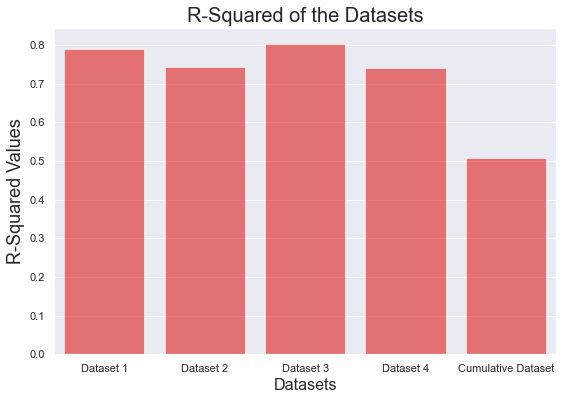

In [209]:
from pylab import rcParams

r_sq_1 = ((np.corrcoef(x1,y1)[0,1])**2)
r_sq_2 = ((np.corrcoef(x2,y2)[0,1])**2)
r_sq_3 = ((np.corrcoef(x3,y3)[0,1])**2)
r_sq_4 = ((np.corrcoef(x4,y4)[0,1])**2)
r_sq_cum = ((np.corrcoef(x_cum,y_cum)[0,1])**2)

a = [r_sq_1, r_sq_2, r_sq_3, r_sq_4, r_sq_cum]
sns.barplot(['Dataset 1','Dataset 2','Dataset 3','Dataset 4','Cumulative Dataset'], a, color='red', alpha=0.6)



sns.set(rc={'figure.figsize':(9,6)}) 
plt.title("R-Squared of the Datasets", fontsize=20)
plt.xlabel('Datasets', fontsize=16)
plt.ylabel('R-Squared Values', fontsize=18)

plt.show()

References:

Simpson's Paradox: Wikipedia Page - https://en.wikipedia.org/wiki/Simpson%27s_paradox

Simpson's Paradox (by minutephysics) - https://www.youtube.com/watch?v=ebEkn-BiW5k

Are University Admissions Biased? | Simpson's Paradox Part 2 (by minutephysics) - https://www.youtube.com/watch?v=E_ME4P9fQbo

How SIMPSON'S PARADOX explains weird COVID19 statistics (Dr. Trefor Bazett) - https://www.youtube.com/watch?v=t-Ci3FosqZs

Numpy Linspace documentation - https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

Combine Dataset in Numpy via Concatenate- https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

Calculate R-Squared with Pythin - https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python
